<a href="https://colab.research.google.com/github/01fe21bec205/Python_for_ML/blob/main/11_Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Read from csv file

In [ ]:
import pandas as pd
df=pd.read_csv('/content/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df['region'].unique()  #to find how many unique elements are there in region column

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
df['sex']=df['sex'].replace({'female':1, 'male':2})
df['smoker']=df['smoker'].replace({'yes':1, 'no':2})
df['region']=df['region'].replace({'southwest':1, 'southeast':2,'northwest':3,'northeast':4})

In [ ]:
x=df.drop(columns = ['charges'])
y=df['charges']

split for training and testing

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=1)

scaling data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xtrain_scaler=scaler.fit_transform(xtrain)
xtest_scaler=scaler.transform(xtest)

model development and evaluation

In [ ]:
from sklearn.linear_model import LinearRegression
lin=LinearRegression()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=6)
xpolytrain=poly.fit_transform(xtrain_scaler)
xtestpoly=poly.transform(xtest_scaler)
poly.fit(xpolytrain,ytrain)
lin.fit(xpolytrain,ytrain)

LinearRegression()

In [ ]:
ypred=lin.predict(xtestpoly)

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest,ypred)


2438625848851.563

In [ ]:
ypredtrain=lin.predict(xpolytrain)
mean_absolute_error(ytrain,ypredtrain)

2099.8557591714853

In [ ]:
poly=PolynomialFeatures(degree=3)
xpolytrain=poly.fit_transform(xtrain_scaler)
xtestpoly=poly.transform(xtest_scaler)
poly.fit(xpolytrain,ytrain)
lin.fit(xpolytrain,ytrain)

LinearRegression()

In [ ]:
ypred=lin.predict(xtestpoly)
mean_absolute_error(ytest,ypred)

2830.6312905970153

In [ ]:
ypredtrain=lin.predict(xpolytrain)
mean_absolute_error(ytrain,ypredtrain)

2830.0685727906284

In [ ]:
from sklearn.metrics import r2_score
r2_score(ytest,ypred)

0.837139355659885

## Generating random x and y

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
import random
x=4*np.random.rand(100,1)-2
y=4+2*x+5* x**2 + np.random.rand(100,1)
poly_features=PolynomialFeatures(degree=2,include_bias=False)
xpoly=poly_features.fit_transform(x)

In [ ]:
#print(x[20])
#print(y[20])

In [ ]:
reg =LinearRegression()

In [ ]:
reg.fit(xpoly,y)

LinearRegression()

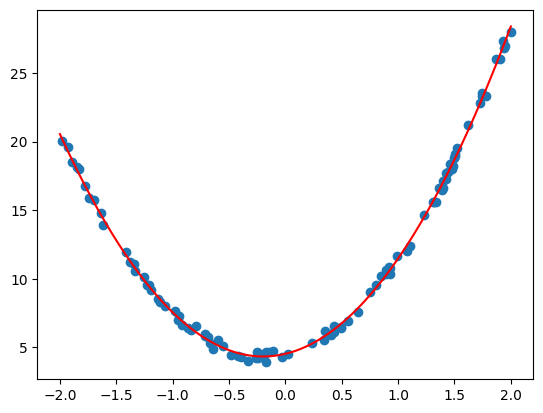

In [ ]:
xval=np.linspace(-2,2,100).reshape(-1,1)
xvalpoly=poly_features.transform(xval)
yval=reg.predict(xvalpoly)
plt.scatter(x,y)
plt.plot(xval,yval,color="r")
plt.show()
